In [1]:
import numpy as np
import rebound
import sys
sys.path.insert(0,'../model')
import mega
import matplotlib.pyplot as plt

In [2]:
# Get Starlink constellations near the 550km orbital shell
constellations = {"Starlink-550": list(filter(lambda x: (abs(x["ALT"]-550)<12 and abs(x["INC"])>49), mega.constellations_all["Starlink"]))}

In [3]:
# Read in observational data
magC,adu,npix,bkgnd,streak,rate = np.genfromtxt("../data/mags-streaks.dat",usecols=(1,3,4,5,6,7),unpack=True)
gmag = -2.5*np.log10(adu - npix*bkgnd) + magC -2.5 * np.log10(30* rate/streak)

In [4]:
# Populate REBOUND simulations
sims = mega.get_simulations(constellations)

In [5]:
# Function to generate plots
def generate_fig(filename=None, latitude=0): 
    # latitude in degrees
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    hour=-1.5
    month=3.8
    albedo=0.2
    area=4 # --> gamma = 1.2
    xy, mag = mega.get_stereographic_data(sims, latitude=latitude, month=month, hour=hour, albedo=albedo, area=area, airmassCoeff=0., elevation_cut = 45)
    xyall = xy
    magall = mag
    for hour in np.arange(-1.25,1.3,0.05):
        xy1, mag1 = mega.get_stereographic_data(sims, latitude=latitude, month=month, hour=hour, albedo=albedo, area=area, airmassCoeff=0., elevation_cut = 45)
        xy = np.append(xy,xy1,axis=0)
        mag = np.append(mag,mag1,axis=0)
    #mag+=np.random.normal(0.,0.2,size=len(mag))
    xy2=xy[xy[:,1]<0]
    #xy3=np.sqrt(xy2[:,1]**2.+xy2[:,0]**2.)
    #xy4=xy2[xy3<np.pi/4.]
    #print(xy3[xy3<np.pi/4.])
    mag2=mag[xy[:,1]<0]
    #mag4=mag2[xy3<np.pi/4.]
    xy4=xy
    mag4=mag
    
    gmagbins = np.linspace(1,10,10)
    ax.set_xlabel(r"$m_{g'}$",fontsize=16)
    ax.set_ylabel("Satellites per Bin (model)",fontsize=16)
    magbins = np.linspace(1,10,30)
    ax.set_xlim([3,9])
    ax.set_ylim([0,100])

    n, bins, patches = ax.hist(mag4,bins=magbins,histtype='stepfilled',color="#A4A4A4",lw=3,zorder=-10)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    ax2 = ax.twinx()
    ax2.hist(gmag,bins=gmagbins,histtype="step",edgecolor="b",hatch='\\',lw=0.5)
    print("medians, real:",np.median(gmag),"model:",np.median(mag4))
    ax2.text(7.2,9.5,'modelled',c='#A4A4A4',fontsize=14)
    ax2.text(7.2,8.9,'observed-Starlink',c='b',fontsize=14)
    ax2.text(9.3,5,"Satellites per Bin (observed)",fontsize=16,verticalalignment='center',rotation=-90)
    plt.ylim(0,10)
            

    if filename is not None:
        plt.savefig(filename,facecolor='white', transparent=False,dpi=200)
        plt.close(fig)
    

medians, real: 5.717310218959091 model: 5.529414941541052


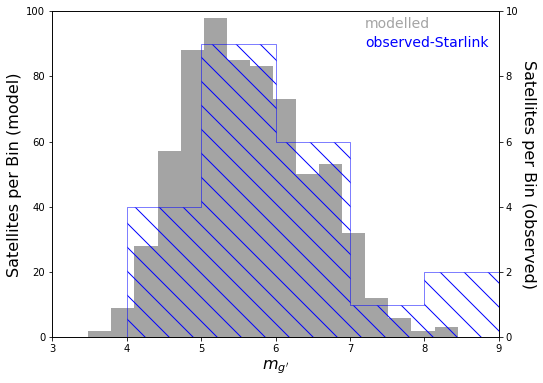

In [6]:
generate_fig(latitude=48.5)

In [7]:
generate_fig("maghist.png", latitude=48.5)

medians, real: 5.717310218959091 model: 5.622116745899151
